In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import stats

In [23]:
data = pd.read_csv("walmart_data.csv")


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130618 entries, 0 to 130617
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     130618 non-null  int64  
 1   Product_ID                  130618 non-null  object 
 2   Gender                      130618 non-null  object 
 3   Age                         130618 non-null  object 
 4   Occupation                  130618 non-null  int64  
 5   City_Category               130618 non-null  object 
 6   Stay_In_Current_City_Years  130618 non-null  object 
 7   Marital_Status              130617 non-null  float64
 8   Product_Category            130617 non-null  float64
 9   Purchase                    130617 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 10.0+ MB


In [25]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
130613,1002053,P00367142,M,46-50,11,C,1,1.0,11.0,6174.0
130614,1002054,P00336942,M,26-35,12,C,4+,0.0,5.0,5455.0
130615,1002054,P00205642,M,26-35,12,C,4+,0.0,5.0,3608.0
130616,1002054,P00228042,M,26-35,12,C,4+,0.0,5.0,3581.0
130617,1002054,P00217942,M,26-35,12,C,4+,NaN,NaN,NaN


In [26]:
data = data.dropna()

In [27]:
data.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [28]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
130612,1002051,P00144642,M,36-45,7,C,2,0.0,1.0,15190.0
130613,1002053,P00367142,M,46-50,11,C,1,1.0,11.0,6174.0
130614,1002054,P00336942,M,26-35,12,C,4+,0.0,5.0,5455.0
130615,1002054,P00205642,M,26-35,12,C,4+,0.0,5.0,3608.0


In [29]:
data.User_ID.value_counts()

1001680    303
1001941    261
1000889    250
1001181    249
1004277    221
          ... 
1003275      1
1000364      1
1004839      1
1000745      1
1001431      1
Name: User_ID, Length: 5855, dtype: int64

In [30]:
data.User_ID.unique()

array([1000001, 1000002, 1000003, ..., 1001906, 1001991, 1002045],
      dtype=int64)

In [31]:
data_per_user = data.groupby(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status'
       ])['Purchase'].sum().reset_index()

In [34]:
#data.groupby(['User_ID']).sum()['Purchase']

In [35]:
#data["total_sum"] = data[data.Purchase.sum()]
#data["Product_Category_sum"]=data['Product_Category'].groupby(data['User_ID']).sum()
# Check out why above not working

In [36]:
data_per_user.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0.0,104349.0
1,1000002,M,55+,16,C,4+,0.0,130081.0
2,1000003,M,26-35,15,A,3,0.0,100271.0
3,1000004,M,46-50,7,B,2,1.0,66607.0
4,1000005,M,26-35,20,A,1,1.0,177802.0


In [37]:
data_per_user['Purchase']

0       104349.0
1       130081.0
2       100271.0
3        66607.0
4       177802.0
          ...   
5850    202905.0
5851    747368.0
5852    336439.0
5853    138801.0
5854    290186.0
Name: Purchase, Length: 5855, dtype: float64

In [56]:
data_per_user.describe()

,User_ID,Occupation,Marital_Status,Purchase
count,5.855000e+03,5855.000000,5855.000000,5.855000e+03
mean,1.003021e+06,8.167720,0.419641,2.073762e+05
std,1.743399e+03,6.327948,0.493542,2.362591e+05
min,1.000001e+06,0.000000,0.000000,7.630000e+02
25%,1.001514e+06,3.000000,0.000000,5.590450e+04
50%,1.003022e+06,7.000000,0.000000,1.239290e+05
75%,1.004526e+06,14.000000,1.000000,2.682410e+05
max,1.006040e+06,20.000000,1.000000,2.596025e+06


In [40]:
data_per_user.Gender.value_counts()

M    4206
F    1649
Name: Gender, dtype: int64

In [41]:
data_per_user.Marital_Status.value_counts()

0.0    3398
1.0    2457
Name: Marital_Status, dtype: int64

In [42]:
data.Occupation.value_counts()

4     17284
0     16761
7     13869
1     11202
17     9449
20     8183
12     7163
14     6424
2      6223
16     6032
6      4665
3      4395
10     3176
15     2876
11     2807
5      2714
19     2152
13     1868
18     1532
9      1465
8       377
Name: Occupation, dtype: int64

In [43]:
data_per_user.City_Category.value_counts()

C    3113
B    1700
A    1042
Name: City_Category, dtype: int64

In [47]:
data_per_user.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,1649.0,170071.871437,200303.386048,956.0,48078.00,98416.0,204577.00,1628571.0
M,4206.0,222001.650499,247434.450305,763.0,60521.25,136430.5,290021.25,2596025.0


In [164]:
data_per_user_sample = [data_per_user[data_per_user['Gender']=='M']['Purchase'].sample(1000).mean() for i in range(1000)]
data_per_user_sample_female = [data_per_user[data_per_user['Gender']=='F']['Purchase'].sample(1000).mean() for i in range(1000)]

In [162]:
lower_limit_male_peruser = pd.Series(data_per_user_sample).mean() - (pd.Series(data_per_user_sample).std()/np.sqrt(1000))*1.96
upper_limit_male_peruser = pd.Series(data_per_user_sample).mean() + (pd.Series(data_per_user_sample).std()/np.sqrt(1000))*1.96

In [163]:
lower_limit_male_peruser,upper_limit_male_peruser

(221963.7458926181, 222794.83985138158)

In [165]:
lower_limit_female_peruser = pd.Series(data_per_user_sample_female).mean() - (pd.Series(data_per_user_sample_female).std()/np.sqrt(1000))*1.96
upper_limit_female_peruser = pd.Series(data_per_user_sample_female).mean() + (pd.Series(data_per_user_sample_female).std()/np.sqrt(1000))*1.96
lower_limit_female_peruser,upper_limit_female_peruser

(169731.19268949417, 170228.04069450573)

Average Female Expenses is around  (169731.19, 170228.04) - When dealing with Every Individual Female with 95% confidence

Average Male Expenses is (221963.74, 222794.83) - When dealing with Every Individual Male with 95% confidence

In [65]:
male_sample_means_individual = [data_per_user[data_per_user['Gender']=='M']['Purchase'].sample(1000).mean() for i in range(1000)]

In [66]:
female_sample_means_individual = [data_per_user[data_per_user['Gender']=='F']['Purchase'].sample(1000).mean() for i in range(1000)]

In [67]:
import statistics
statistics.mean(male_sample_means_individual)

221866.415468

In [68]:
statistics.mean(female_sample_means_individual)

170086.974787

# Looking at Data per transations

In [77]:
df=data

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

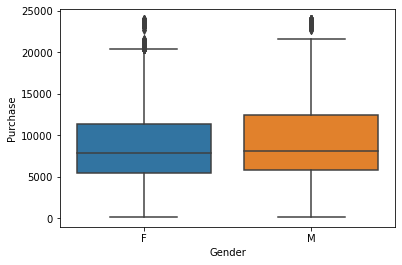

In [84]:
sbn.boxplot(x='Gender',y='Purchase',data=df)

In [86]:
df['Gender'].value_counts(normalize=True)

M    0.7553
F    0.2447
Name: Gender, dtype: float64

(array([31962.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 98655.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

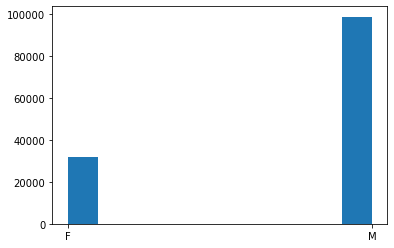

In [87]:
plt.hist(df['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Count'>

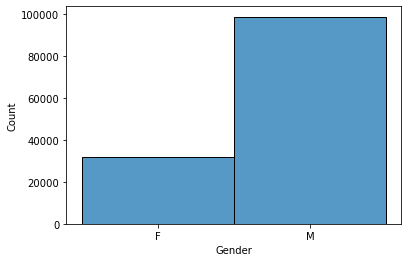

In [88]:
sbn.histplot(df['Gender'])

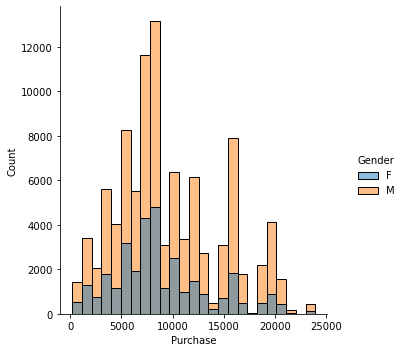

In [93]:
sbn.displot(data=df,x='Purchase',hue='Gender', bins=25)  

In [94]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,31962.0,8774.435767,4694.972393,188.0,5448.0,7922.0,11413.0,23948.0
M,98655.0,9464.689494,5057.560677,185.0,5881.0,8099.0,12475.0,23961.0


In [70]:
male_sample_means = [data[data['Gender']=='M']['Purchase'].sample(1000).mean() for i in range(1000)]

In [71]:
female_sample_means = [data[data['Gender']=='F']['Purchase'].sample(1000).mean() for i in range(1000)]

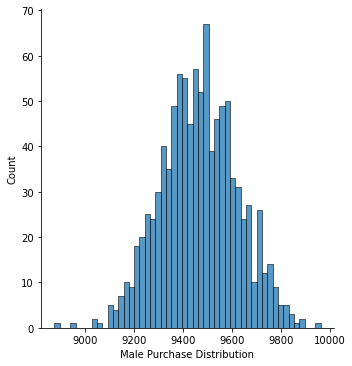

In [143]:
am = sbn.displot(male_sample_means, bins=50,)
am.set(xlabel='Male Purchase Distribution', ylabel='Count')
plt.show()

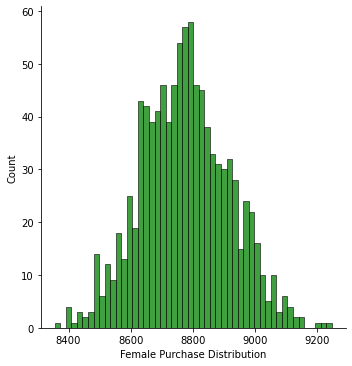

In [142]:
ax=sbn.displot(female_sample_means, bins=50,color='Green')
ax.set(xlabel='Female Purchase Distribution', ylabel='Count')
plt.show()

In [102]:
pd.Series(male_sample_means).mean()

9465.927821

In [103]:
pd.Series(male_sample_means).std()

155.17173073371933

In [115]:
lower_limit=pd.Series(male_sample_means).mean() - (pd.Series(male_sample_means).std()/np.sqrt(1000))*1.96

In [116]:
upper_limit=pd.Series(male_sample_means).mean() + (pd.Series(male_sample_means).std()/np.sqrt(1000))*1.96

In [117]:
lower_limit,upper_limit

(9456.310177487258, 9475.545464512741)

We have 95 percentage Confidence that our mean lies between 9456.31 and 9475.54 for males

In [118]:
lower_limit_female=pd.Series(female_sample_means).mean() - (pd.Series(female_sample_means).std()/np.sqrt(1000))*1.96

In [119]:
upper_limit_female=pd.Series(female_sample_means).mean() + (pd.Series(female_sample_means).std()/np.sqrt(1000))*1.96

In [121]:
lower_limit_female,upper_limit_female

(8765.778459337509, 8783.398300662482)

We have 95 percentage Confidence that our mean lies between 8765.77 and 8783.39 for females

In [122]:
# For 90 and 99 >> alpha - 0.1,0.01 >> alpha/2 - 0.05,0.005 >> z-score - 1.645,2.576

In [127]:
lower_limit_male_90 = pd.Series(male_sample_means).mean() - (pd.Series(male_sample_means).std()/np.sqrt(1000))*1.645
lower_limit_male_99 = pd.Series(male_sample_means).mean() - (pd.Series(male_sample_means).std()/np.sqrt(1000))*2.576
lower_limit_female_90 = pd.Series(female_sample_means).mean() - (pd.Series(female_sample_means).std()/np.sqrt(1000))*1.645
lower_limit_female_99 = pd.Series(female_sample_means).mean() - (pd.Series(female_sample_means).std()/np.sqrt(1000))*2.576

In [128]:
upper_limit_male_90 = pd.Series(male_sample_means).mean() + (pd.Series(male_sample_means).std()/np.sqrt(1000))*1.645
upper_limit_male_99 = pd.Series(male_sample_means).mean() + (pd.Series(male_sample_means).std()/np.sqrt(1000))*2.576
upper_limit_female_90 = pd.Series(female_sample_means).mean() + (pd.Series(female_sample_means).std()/np.sqrt(1000))*1.645
upper_limit_female_99 = pd.Series(female_sample_means).mean() + (pd.Series(female_sample_means).std()/np.sqrt(1000))*2.576

In [129]:
lower_limit_male_90,upper_limit_male_90

(9457.855870194662, 9473.999771805336)

In [130]:
lower_limit_male_99,upper_limit_male_99

(9453.287489526108, 9478.56815247389)

In [131]:
lower_limit_female_90,upper_limit_female_90

(8767.19433944398, 8781.98242055601)

In [132]:
lower_limit_female_99,upper_limit_female_99

(8763.009627129299, 8786.167132870693)

We have 90 percentage Confidence that our mean lies between 9457.85 and 9473.99 for males
We have 90 percentage Confidence that our mean lies between 8767.19 and 8781.98 for females

In [133]:
df[df['Gender']=='M']['Purchase'].mean()

9464.689493690132

In [134]:
df[df['Gender']=='F']['Purchase'].mean()

8774.435767473875

In [ ]:
Married vs Unmaarried

In [146]:
df.Marital_Status.value_counts()

0.0    77225
1.0    53392
Name: Marital_Status, dtype: int64

In [147]:
married_sample_means = [data[data['Marital_Status']==1.0]['Purchase'].sample(1000).mean() for i in range(1000)]

In [149]:
unmarried_sample_means = [data[data['Marital_Status']==0.0]['Purchase'].sample(1000).mean() for i in range(1000)]

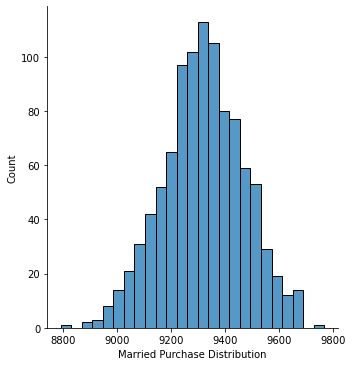

In [153]:
plot_married = sbn.displot(married_sample_means,bins=25)
plot_married.set(xlabel='Married Purchase Distribution', ylabel='Count')
plt.show()



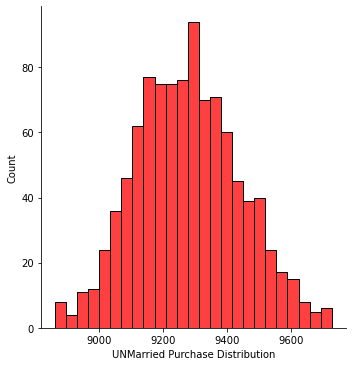

In [169]:
plot_unmarried = sbn.displot(unmarried_sample_means,bins=25,color='Red')
plot_unmarried.set(xlabel='UNMarried Purchase Distribution', ylabel='Count')
plt.show()

In [155]:
pd.Series(married_sample_means).mean()

9320.925749999993

In [156]:
pd.Series(married_sample_means).std()

149.93161942436532

In [166]:
def limit_calculator(sample,accuracy,sample_size):
    hmap={90:1.65,95:1.96,99:2.56}
    lower_limit = pd.Series(sample).mean() - (pd.Series(sample).std()/np.sqrt(sample_size))*hmap[accuracy]
    upper_limit = pd.Series(sample).mean() + (pd.Series(sample).std()/np.sqrt(sample_size))*hmap[accuracy]
    return lower_limit,upper_limit

In [171]:
married_lower,married_upper=limit_calculator(married_sample_means,95,1000)
unmarried_lower,unmarried_upper=limit_calculator(unmarried_sample_means,95,1000)

In [172]:
married_lower,married_upper

(9311.632891951085, 9330.218608048901)

In [173]:
unmarried_lower,unmarried_upper

(9267.384330050021, 9287.536597949997)

Married people spend around 9311 and 9330 whereas Unmarried Spend 9267and 9287 with 95% confidence

In [175]:
df.Age.value_counts()

26-35    51872
36-45    26001
18-25    24325
46-50    10567
51-55     9141
55+       5008
0-17      3703
Name: Age, dtype: int64

In [176]:
def cal_samples(df,column_name,column_value,sample_size):
    sample = [df[df[column_name]==column_value]['Purchase'].sample(sample_size).mean() for i in range(sample_size)]
    return sample

In [178]:
sample_17 = cal_samples(df,'Age','0-17',1000)
sample_18_25 = cal_samples(df,'Age','18-25',1000)
sample_26_35 = cal_samples(df,'Age','26-35',1000)
sample_36_45 = cal_samples(df,'Age','36-45',1000)
sample_46_50 = cal_samples(df,'Age','46-50',1000)
sample_51_55 = cal_samples(df,'Age','51-55',1000)
sample_56 = cal_samples(df,'Age','55+',1000)

In [179]:
sample_17_lower,sample_17_upper=limit_calculator(sample_17,95,1000)
sample_18_25_lower,sample_18_25_upper=limit_calculator(sample_18_25,95,1000)
sample_26_35_lower,sample_26_35_upper=limit_calculator(sample_26_35,95,1000)
sample_45_lower,sample_45_upper=limit_calculator(sample_36_45,95,1000)
sample_50_lower,sample_50_upper=limit_calculator(sample_46_50,95,1000)
sample_55_lower,sample_55_upper=limit_calculator(sample_51_55,95,1000)
sample_56_lower,sample_56_upper=limit_calculator(sample_56,95,1000)



In [184]:
y_axis=[sample_17_lower,sample_18_25_lower,sample_26_35_lower,sample_45_lower,sample_50_lower,sample_55_lower,sample_56_lower]
y_axis_up=[sample_17_upper,sample_18_25_upper,sample_26_35_upper,sample_45_upper,sample_50_upper,sample_55_upper,sample_56_upper]
x_axis=['0-17','18-25','26-35','36-45','46-50','51-55','55+']

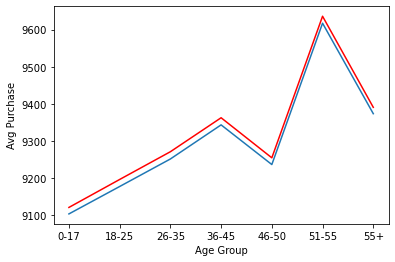

In [195]:
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y_axis_up,color='red')
plt.xlabel("Age Group")
plt.ylabel("Avg Purchase")
plt.show()

In [187]:
# We observe customers from age group 51-55 are spending more but there is significant drop to age group from 46-50

In [197]:
(9456.31+9475.54)/2

9465.925

In [198]:
8765.77 +8783.39

17549.16

In [199]:
17549.16/2

8774.58